In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters

import matplotlib.pyplot as plt

from util import (
    transform_column_name,
    LAYER_CLASSES,
)

# Extend the default number of rows we see
pd.set_option("display.max_rows", None)

# Silence warnings
register_matplotlib_converters()

# Extend the default number of rows we see
pd.set_option("display.max_rows", 500)

# Use a pleasant typeface. Set the graph DPI. Remove top and right lines in
# plot. NOTE: Comment the font out before autograder submission!
# plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["font.family"] = "Circular"
plt.rcParams["figure.dpi"] = 150
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["legend.fontsize"] = "small"
plt.rcParams["legend.fancybox"] = False


## Some checks of the ICD10 Class frequency matrix

### Read the Data


In [2]:
layer_1_data = pd.read_parquet(
    "../data/processed/100-layer-frequencies_layer_1.parquet",
    engine="pyarrow",
)

layer_1_data.head()


,Member_Life_ID,Gender_Code,A00_B99,C00_D49,D50_D89,E00_E89,F01_F99,G00_G99,H00_H59,H60_H95,...,L00_L99,M00_M99,N00_N99,O00_O9A,P00_P96,Q00_Q99,R00_R99,S00_T88,U00_U85,Z00_Z99
0,154,1,1,2,4,4,0,0,4,2,...,5,0,4,0,0,0,14,0,0,7
1,169,0,0,1,0,0,1,0,2,1,...,1,2,0,0,0,0,2,1,0,7
2,234,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,383,1,1,2,1,1,6,2,5,0,...,3,10,2,0,0,0,17,9,2,8
4,428,0,0,1,0,1,0,0,2,1,...,0,0,4,0,0,0,4,0,0,6


In [3]:
layer_2_data = pd.read_parquet(
    "../data/processed/100-layer-frequencies_layer_2.parquet",
    engine="pyarrow",
)

layer_2_data.head()


,Member_Life_ID,Gender_Code,A00_A09,A15_A19,A20_A28,A30_A49,A50_A64,A65_A69,A70_A74,A75_A79,...,Z19_Z19,Z20_Z29,Z30_Z39,Z40_Z53,Z55_Z65,Z66_Z66,Z67_Z67,Z68_Z68,Z69_Z76,Z77_Z99
0,154,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2,2
1,169,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
2,234,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,383,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,3,3
4,428,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2


In [4]:
layer_3_data = pd.read_parquet(
    "../data/processed/100-layer-frequencies_layer_3.parquet",
    engine="pyarrow",
)

layer_3_data.head()


,Member_Life_ID,Gender_Code,A00,A01,A02,A03,A04,A05,A06,A07,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,154,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,169,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,234,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,383,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,428,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Check Dimensions


In [5]:
for _ in [1, 2, 3]:
    print(f"Layer {_} has dimensions {eval(f'layer_{_}_data').shape}")


Layer 1 has dimensions (99996, 23)
Layer 2 has dimensions (99996, 257)
Layer 3 has dimensions (99996, 1648)


### Check `NaN`s


In [6]:
for _ in [1, 2, 3]:
    print(
        f"Layer {_} has {len(eval(f'layer_{_}_data')[eval(f'layer_{_}_data').isna().any(axis=1)])} NaN values"
    )


Layer 1 has 0 NaN values
Layer 2 has 0 NaN values
Layer 3 has 0 NaN values


### Set up the sample data


In [7]:
SAMPLE_MEMBER_LIFE_ID = 154

LAYER_DATAFRAME = {
    1: layer_1_data,
    2: layer_2_data,
    3: layer_3_data,
}


Now we see a particular Member Life ID (whatever's assigned to `SAMPLE_MEMBER_LIFE_ID`). _We expect just one record for each layer!_


In [8]:
LAYER_DATAFRAME[1][LAYER_DATAFRAME[1]["Member_Life_ID"] == SAMPLE_MEMBER_LIFE_ID]


,Member_Life_ID,Gender_Code,A00_B99,C00_D49,D50_D89,E00_E89,F01_F99,G00_G99,H00_H59,H60_H95,...,L00_L99,M00_M99,N00_N99,O00_O9A,P00_P96,Q00_Q99,R00_R99,S00_T88,U00_U85,Z00_Z99
0,154,1,1,2,4,4,0,0,4,2,...,5,0,4,0,0,0,14,0,0,7


In [9]:
LAYER_DATAFRAME[2][LAYER_DATAFRAME[2]["Member_Life_ID"] == SAMPLE_MEMBER_LIFE_ID]


,Member_Life_ID,Gender_Code,A00_A09,A15_A19,A20_A28,A30_A49,A50_A64,A65_A69,A70_A74,A75_A79,...,Z19_Z19,Z20_Z29,Z30_Z39,Z40_Z53,Z55_Z65,Z66_Z66,Z67_Z67,Z68_Z68,Z69_Z76,Z77_Z99
0,154,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2,2


In [10]:
LAYER_DATAFRAME[3][LAYER_DATAFRAME[3]["Member_Life_ID"] == SAMPLE_MEMBER_LIFE_ID]


,Member_Life_ID,Gender_Code,A00,A01,A02,A03,A04,A05,A06,A07,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,154,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# Just making sure that the ignored classes are not present, at least in Layer 1
LAYER_CLASSES[1].keys()


dict_keys(['A00_B99', 'C00_D49', 'D50_D89', 'E00_E89', 'F01_F99', 'G00_G99', 'H00_H59', 'H60_H95', 'I00_I99', 'J00_J99', 'K00_K95', 'L00_L99', 'M00_M99', 'N00_N99', 'O00_O9A', 'P00_P96', 'Q00_Q99', 'R00_R99', 'S00_T88', 'U00_U85', 'Z00_Z99'])

In [12]:
# Do we have the correct number of ICD10 codes? Mess with this ID and check
# manually. The class frequencies should be the same across all layer-n
# dataframes! If not, you screwed up here!
for layer_number in [1, 2, 3]:
    counter = 0

    for _ in [transform_column_name(_) for _ in LAYER_CLASSES[layer_number].keys()]:
        counter += LAYER_DATAFRAME[layer_number][
            LAYER_DATAFRAME[layer_number]["Member_Life_ID"] == SAMPLE_MEMBER_LIFE_ID
        ][_]

    print(
        f"ID {SAMPLE_MEMBER_LIFE_ID} had {int(counter)} unique Layer {str(layer_number)} classifications"
    )


ID 154 had 67 unique Layer 1 classifications
ID 154 had 67 unique Layer 2 classifications
ID 154 had 67 unique Layer 3 classifications


Print out the _final_ number of classes you're going to use for the report.


In [13]:
for layer_number in [1, 2, 3]:
    print(
        f"Layer {layer_number} has {len([_ for _ in LAYER_CLASSES[layer_number].keys()])} classes."
    )


Layer 1 has 21 classes.
Layer 2 has 255 classes.
Layer 3 has 1646 classes.


### Density Checks


In [14]:
for layer_number in [1, 2, 3]:
    foo = LAYER_DATAFRAME[layer_number][LAYER_DATAFRAME[layer_number].columns[2:]]
    bar = foo.astype(pd.SparseDtype("float", 0.0))

    print(
        f"Layer {layer_number} has a density of {round(bar.sparse.density * 100, 2)}%"
    )


Layer 1 has a density of 30.23%
Layer 2 has a density of 4.65%
Layer 3 has a density of 0.94%


### Top 10 Classifications


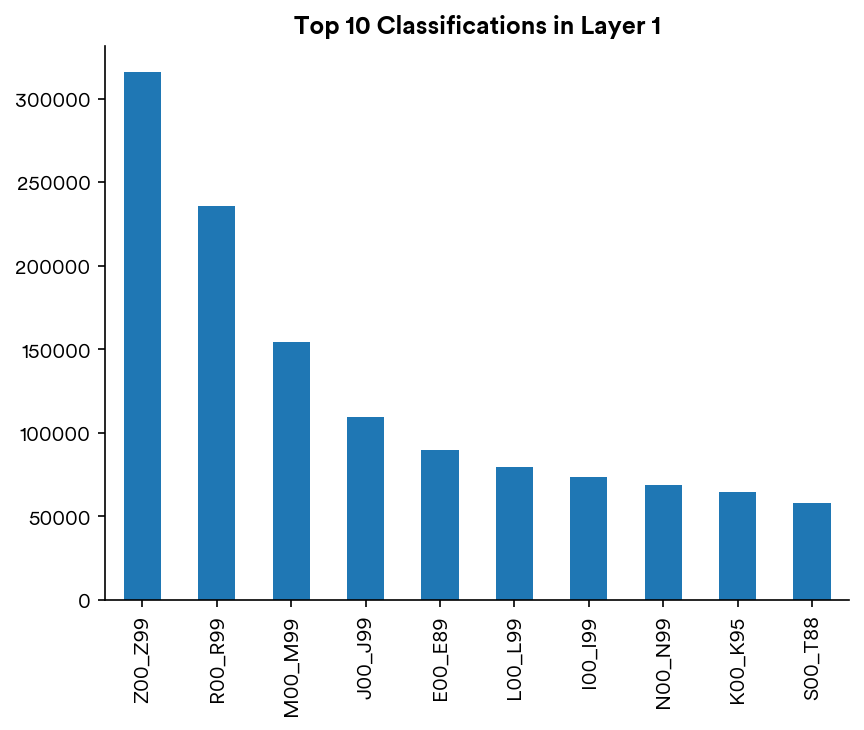

In [15]:
## Adding values of each class and sorting in descending order

arr = layer_1_data.iloc[:, 2:].sum(axis=0).sort_values(ascending=False).head(10)

arr.plot.bar(use_index=True)
plt.title("Top 10 Classifications in Layer 1", fontweight="bold")
plt.show()


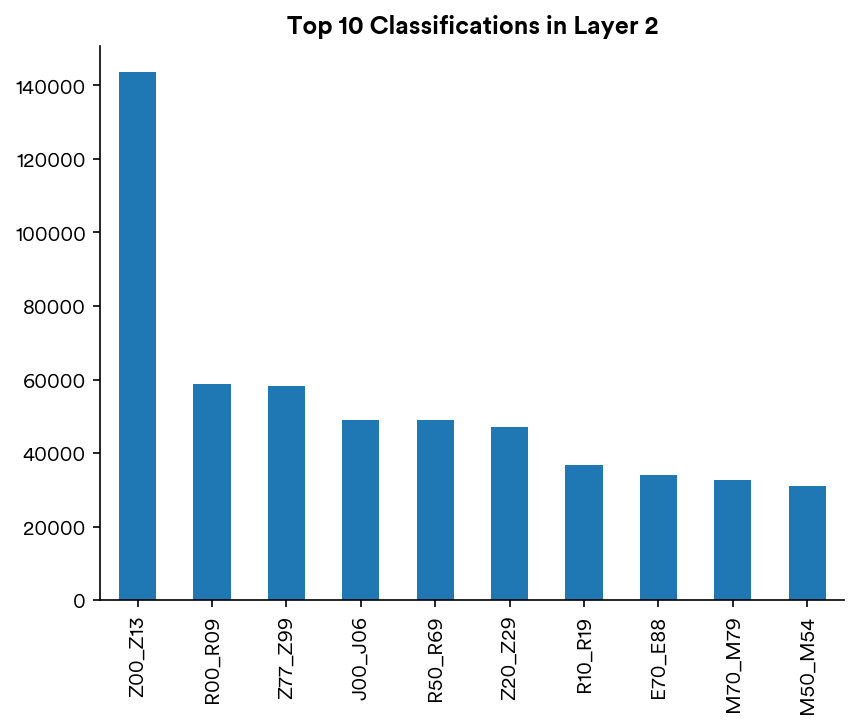

In [16]:
arr2 = layer_2_data.iloc[:, 2:].sum(axis=0).sort_values(ascending=False).head(10)

arr2.plot.bar(use_index=True)
plt.title("Top 10 Classifications in Layer 2", fontweight="bold")
plt.show()


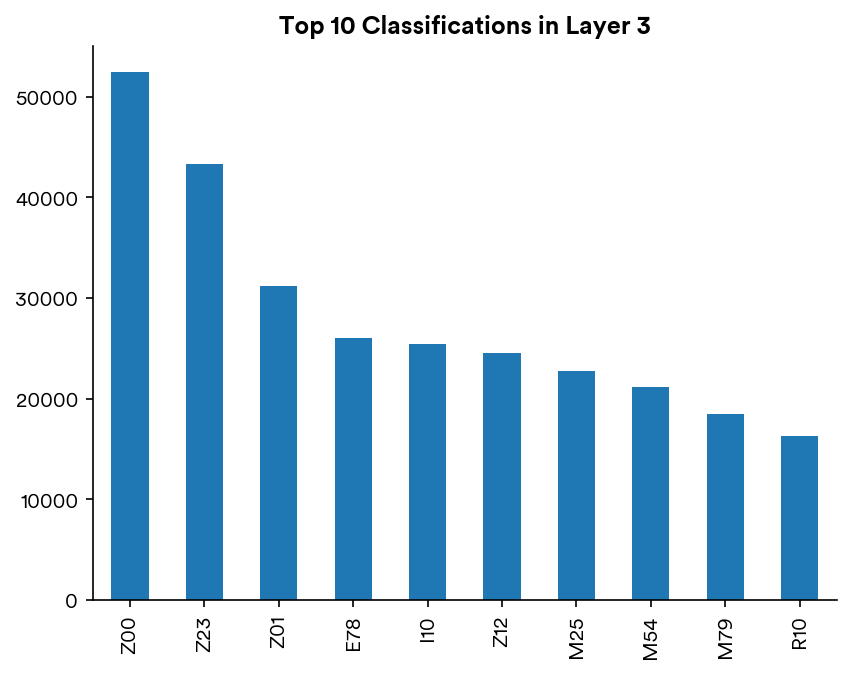

In [17]:
arr3 = layer_3_data.iloc[:, 2:].sum(axis=0).sort_values(ascending=False).head(10)

arr3.plot.bar(use_index=True)
plt.title("Top 10 Classifications in Layer 3", fontweight="bold")
plt.show()


### Check if the Member IDs are the same in all layers

This becomes very important when it comes to the API!

In [18]:
l1_member_ids = layer_1_data["Member_Life_ID"]
l2_member_ids = layer_2_data["Member_Life_ID"]
l3_member_ids = layer_3_data["Member_Life_ID"]

print("l1_member_ids <-> l2_member_ids: ", np.array_equal(l1_member_ids, l2_member_ids))
print("l2_member_ids <-> l3_member_ids: ", np.array_equal(l2_member_ids, l3_member_ids))
print("l2_member_ids <-> l3_member_ids: ", np.array_equal(l3_member_ids, l1_member_ids))


l1_member_ids <-> l2_member_ids:  True
l2_member_ids <-> l3_member_ids:  True
l2_member_ids <-> l3_member_ids:  True


### Frequency Averages (Non-Zero) for each Layer

In [33]:
print(
    "Layer 1's average non-zero rating is",
    np.mean([_ for _ in layer_1_data.iloc[:, 2:].max() if _ != 0]),
)
print(
    "Layer 2's average non-zero rating is",
    np.mean([_ for _ in layer_2_data.iloc[:, 2:].max() if _ != 0]),
)
print(
    "Layer 3's average non-zero rating is",
    np.mean([_ for _ in layer_3_data.iloc[:, 2:].max() if _ != 0]),
)


Layer 1's average non-zero rating is 17.38095238095238
Layer 2's average non-zero rating is 3.525691699604743
Layer 3's average non-zero rating is 1.0050825921219821
